In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
# Load the dataset
file_path = r"C:/Users/muge/Dropbox/GMU/DAEN 690/Data/DAEN_690_Validation_CAD.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

   Dataset Size Set No     Label  Dataset ID  Model Pretrained Model  \
0           500  Set 1  Positive      1147.0  945.0         ResNet18   
1           500    NaN       NaN         NaN    NaN         ResNet18   
2           500    NaN       NaN         NaN    NaN         ResNet50   
3           500    NaN  Negative      1148.0    NaN         ResNet50   
4           500    NaN       NaN         NaN    NaN     Inception_V3   

   Version No  Epoch  Training Accuracy  Validation Accuracy  Training Loss  \
0         335     20              59.00                  2.0           1.41   
1         336     50              59.25                 58.0           1.49   
2         337     20              57.00                 77.0           1.47   
3         338     50              55.00                 62.0           1.51   
4         343     20              62.25                 54.0           1.46   

   Validation Loss Training Time  Training Minutes  Training Seconds  
0            76.10   

In [3]:
print(data.dtypes)

Dataset Size             int64
Set No                  object
Label                   object
Dataset ID             float64
Model                  float64
Pretrained Model        object
Version No               int64
Epoch                    int64
Training Accuracy      float64
Validation Accuracy    float64
Training Loss          float64
Validation Loss        float64
Training Time           object
Training Minutes         int64
Training Seconds         int64
dtype: object


## Validation & Training Loss

#### Validation Loss over Epochs

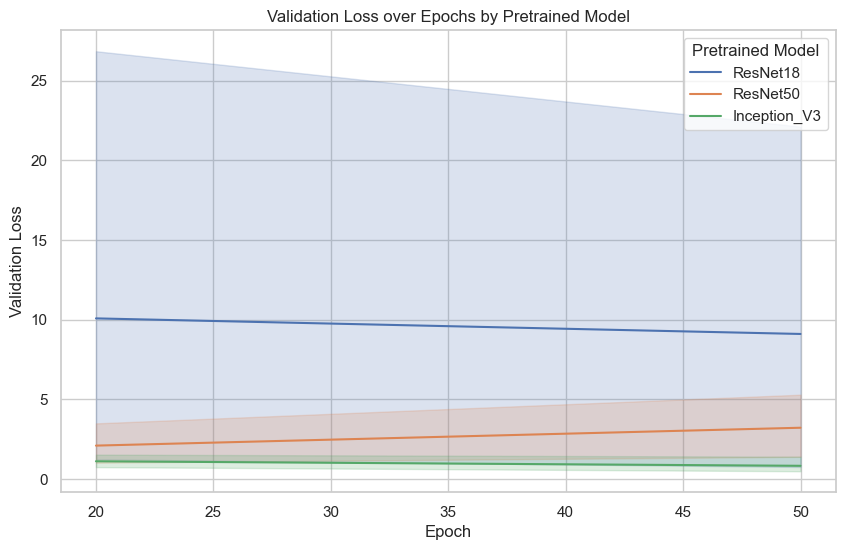

In [4]:
#Line Plot for Validation Loss over Epochs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='Validation Loss', hue='Pretrained Model', data=data)
plt.title('Validation Loss over Epochs by Pretrained Model')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.show()

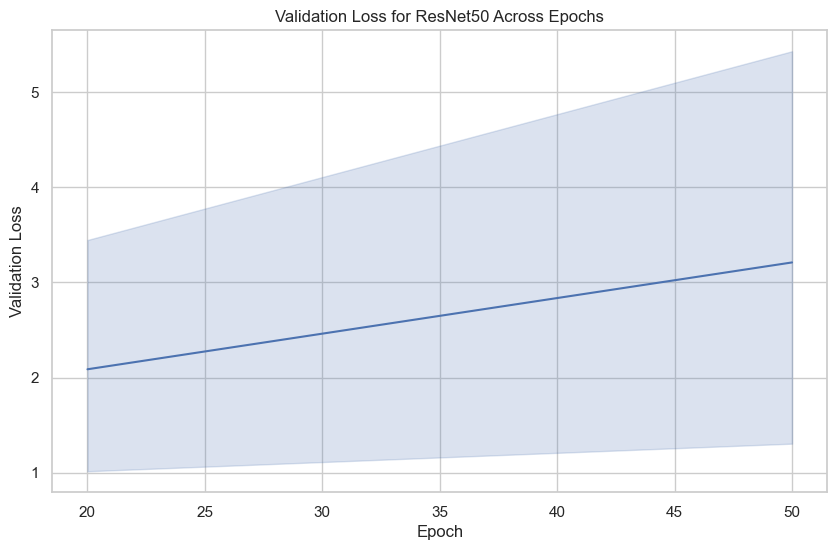

In [5]:
# Filter the data for ResNet50
resnet50_data = data[data['Pretrained Model'] == 'ResNet50']

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='Validation Loss', data=resnet50_data)
plt.title('Validation Loss for ResNet50 Across Epochs')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.show()

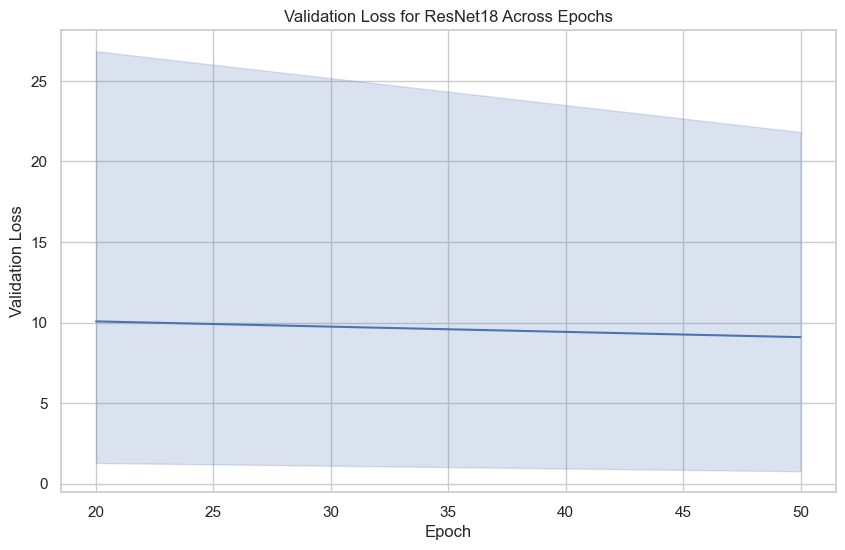

In [6]:
# Filter the data for ResNet50
resnet18_data = data[data['Pretrained Model'] == 'ResNet18']

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='Validation Loss', data=resnet18_data)
plt.title('Validation Loss for ResNet18 Across Epochs')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.show()

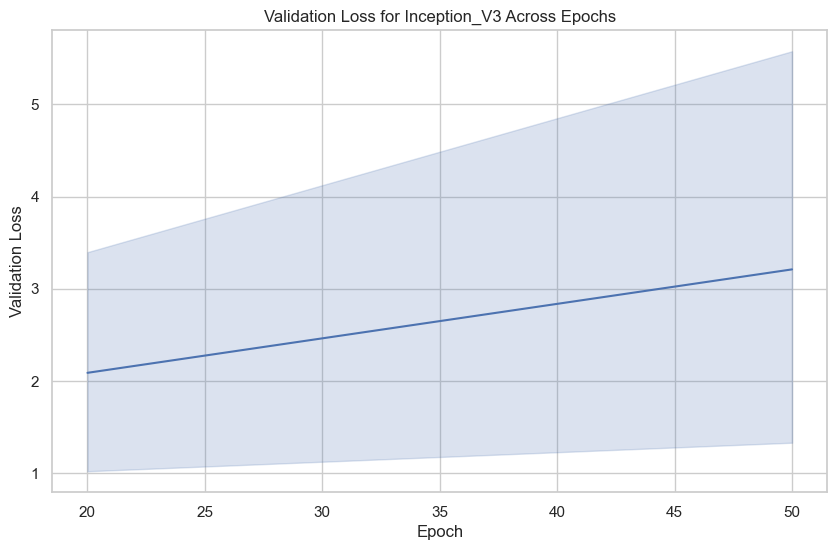

In [7]:
# Filter the data for ResNet50
Inception_V3_data = data[data['Pretrained Model'] == 'Inception_V3']

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='Validation Loss', data=resnet50_data)
plt.title('Validation Loss for Inception_V3 Across Epochs')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.show()

#### Check for outliers

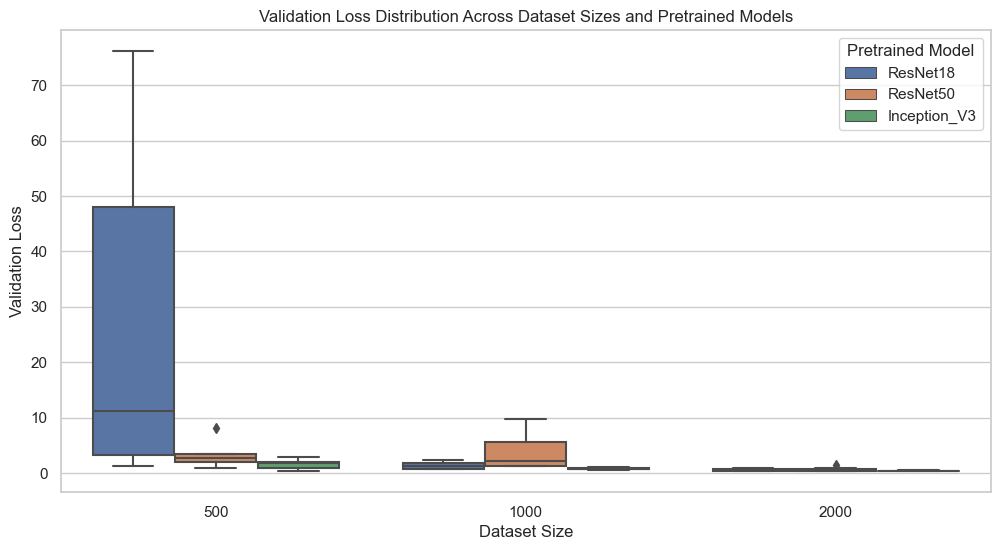

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for validation loss across different dataset sizes and pretrained models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dataset Size', y='Validation Loss', hue='Pretrained Model', data=data)
plt.title('Validation Loss Distribution Across Dataset Sizes and Pretrained Models')
plt.xlabel('Dataset Size')
plt.ylabel('Validation Loss')
plt.legend(title='Pretrained Model', loc='upper right')
plt.show()

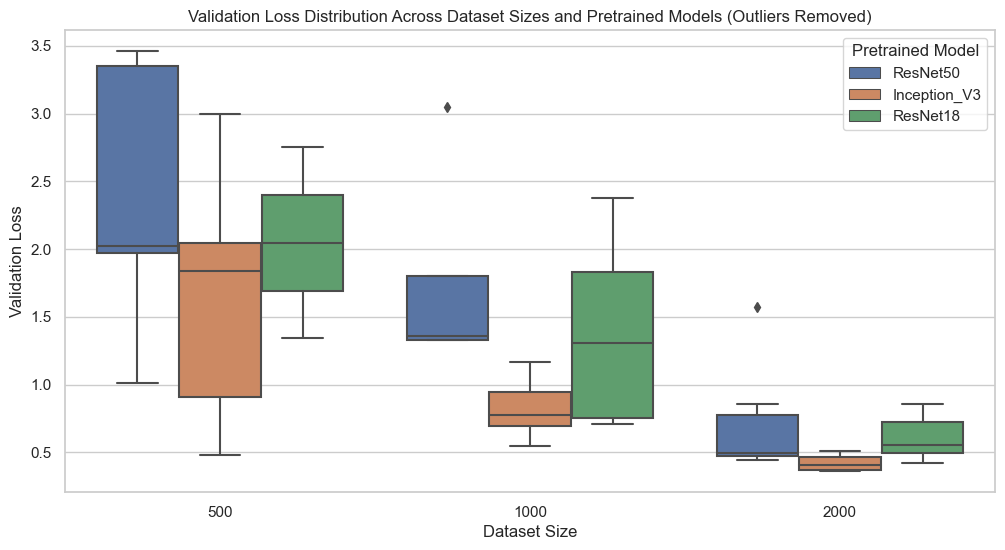

In [9]:
import pandas as pd
import numpy as np

# Calculate the first and third quartiles
Q1 = data['Validation Loss'].quantile(0.25)
Q3 = data['Validation Loss'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_data = data[(data['Validation Loss'] >= lower_bound) & (data['Validation Loss'] <= upper_bound)]

# Create a boxplot for the filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dataset Size', y='Validation Loss', hue='Pretrained Model', data=filtered_data)
plt.title('Validation Loss Distribution Across Dataset Sizes and Pretrained Models (Outliers Removed)')
plt.xlabel('Dataset Size')
plt.ylabel('Validation Loss')
plt.legend(title='Pretrained Model', loc='upper right')
plt.show()

### Impact of Dataset Size and Epoch

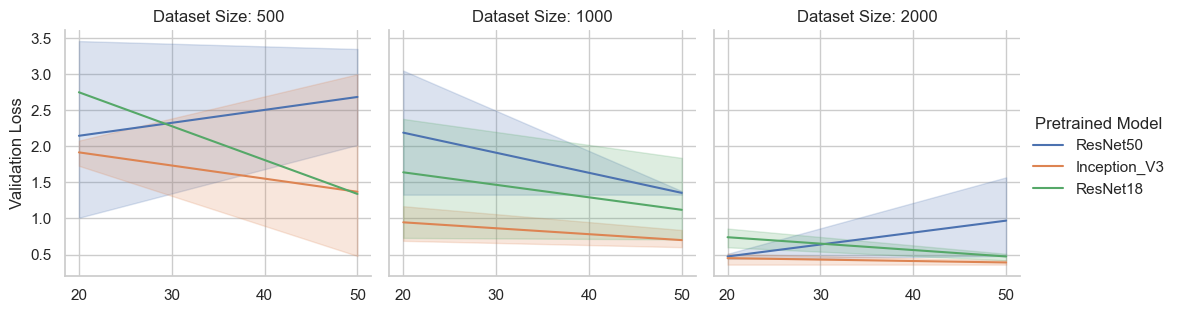

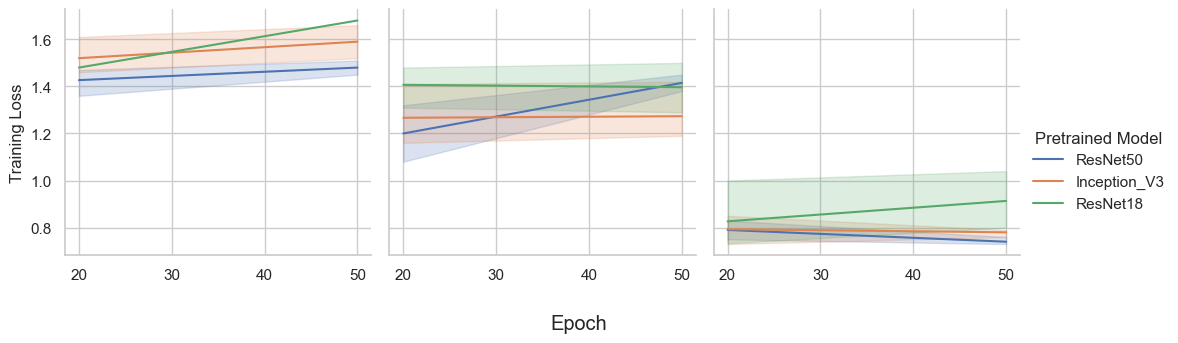

In [10]:
# Create a FacetGrid with one plot for each dataset size for Validation Loss
g1 = sns.FacetGrid(data, col='Dataset Size', col_wrap=3, height=3.5, aspect=1)
g1.map(sns.lineplot, 'Epoch', 'Validation Loss', hue='Pretrained Model', markers=True, data=filtered_data)
g1.set_titles('Dataset Size: {col_name}')
g1.set_xlabels('')
g1.set_ylabels('Validation Loss')
g1.add_legend(title='Pretrained Model')
g1.fig.suptitle('', x=0.5, y=0.02)
plt.show()

# Create a FacetGrid with one plot for each dataset size for Training Loss
g2 = sns.FacetGrid(data, col='Dataset Size', col_wrap=3, height=3.5, aspect=1)
g2.map(sns.lineplot, 'Epoch', 'Training Loss', hue='Pretrained Model', markers=True, data=filtered_data)
g2.set_titles('')
g2.set_xlabels('')
g2.set_ylabels('Training Loss')
g2.add_legend(title='Pretrained Model')
g2.fig.suptitle('Epoch', x=0.5, y=0.02)
plt.show()

### ResNet18: Validation & Training Loss by Dataset Size and Epoch

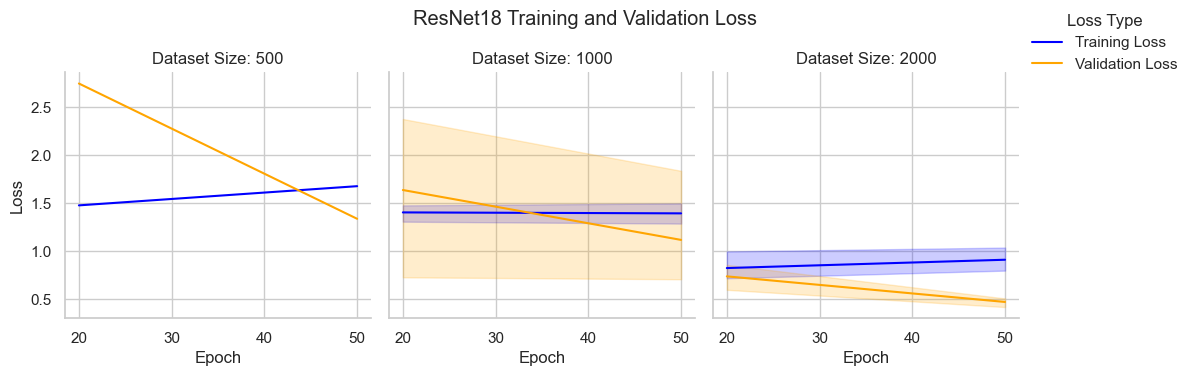

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for only ResNet18
resnet18_data = filtered_data[filtered_data['Pretrained Model'] == 'ResNet18']

# Create a FacetGrid with one plot for each dataset size for both Training Loss and Validation Loss
g = sns.FacetGrid(resnet18_data, col='Dataset Size', col_wrap=3, height=3.5, aspect=1)
g.map(sns.lineplot, 'Epoch', 'Training Loss', color='blue', label='Training Loss')
g.map(sns.lineplot, 'Epoch', 'Validation Loss', color='orange', label='Validation Loss')
g.set_titles('Dataset Size: {col_name}')
g.set_xlabels('Epoch')
g.set_ylabels('Loss')
g.add_legend(title='Loss Type', loc='upper right')
g.fig.suptitle('Epoch', x=0.5, y=0.02)
plt.suptitle('ResNet18 Training and Validation Loss', x=0.5, y=1.07)
plt.show()

#### ResNet50: Validation & Training Loss by Dataset Size and Epoch

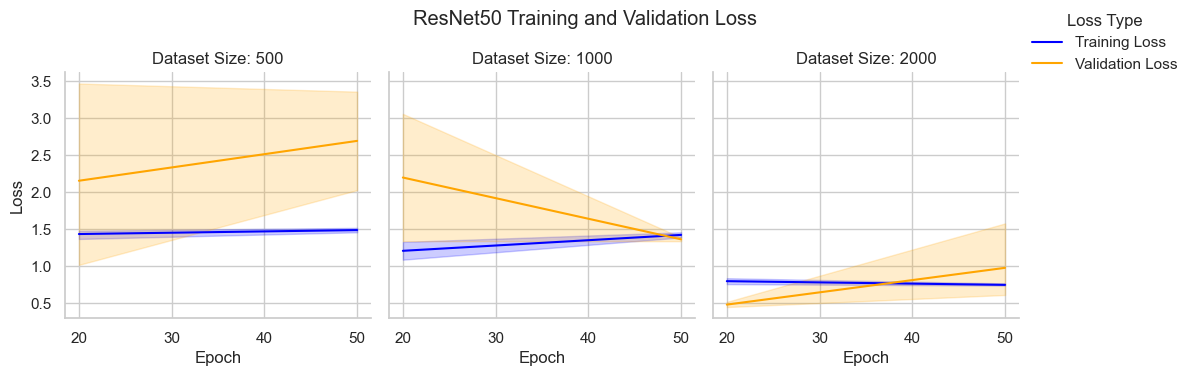

In [12]:
# Filter the data for only ResNet50
resnet50_data = filtered_data[filtered_data['Pretrained Model'] == 'ResNet50']

# Create a FacetGrid with one plot for each dataset size for both Training Loss and Validation Loss
g = sns.FacetGrid(resnet50_data, col='Dataset Size', col_wrap=3, height=3.5, aspect=1)
g.map(sns.lineplot, 'Epoch', 'Training Loss', color='blue', label='Training Loss')
g.map(sns.lineplot, 'Epoch', 'Validation Loss', color='orange', label='Validation Loss')
g.set_titles('Dataset Size: {col_name}')
g.set_xlabels('Epoch')
g.set_ylabels('Loss')
g.add_legend(title='Loss Type', loc='upper right')
g.fig.suptitle('Epoch', x=0.5, y=0.02)
plt.suptitle('ResNet50 Training and Validation Loss', x=0.5, y=1.07)
plt.show()

#### InceptionV3: Validation & Training Loss by Dataset Size and Epoch

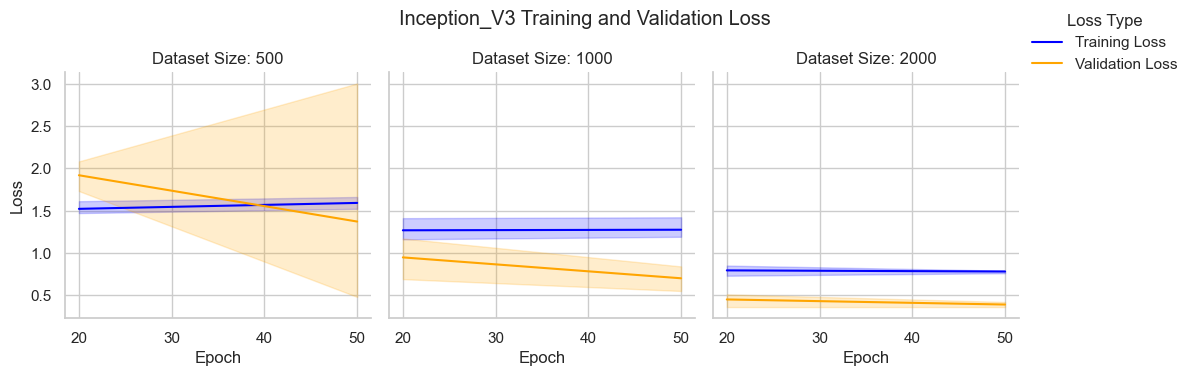

In [13]:
# Filter the data for only ResNet18
Inception_V3_data = filtered_data[filtered_data['Pretrained Model'] == 'Inception_V3']

# Create a FacetGrid with one plot for each dataset size for both Training Loss and Validation Loss
g = sns.FacetGrid(Inception_V3_data, col='Dataset Size', col_wrap=3, height=3.5, aspect=1)
g.map(sns.lineplot, 'Epoch', 'Training Loss', color='blue', label='Training Loss')
g.map(sns.lineplot, 'Epoch', 'Validation Loss', color='orange', label='Validation Loss')
g.set_titles('Dataset Size: {col_name}')
g.set_xlabels('Epoch')
g.set_ylabels('Loss')
g.add_legend(title='Loss Type', loc='upper right')
g.fig.suptitle('Epoch', x=0.5, y=0.02)
plt.suptitle('Inception_V3 Training and Validation Loss', x=0.5, y=1.07)
plt.show()

## Training Time 

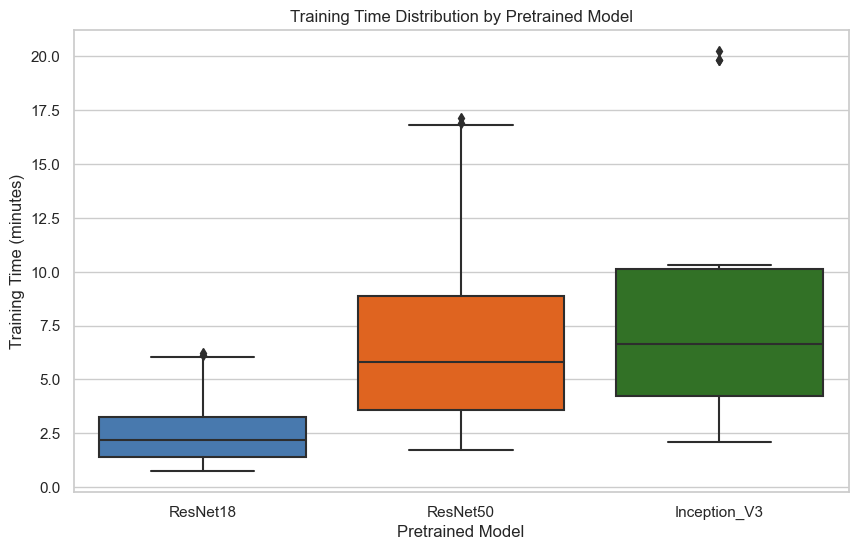

In [14]:
# Convert Training Seconds to minutes
data['Training Time'] = data['Training Minutes'] + data['Training Seconds'] / 60

# Box Plot for Training Time by Pretrained Model
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pretrained Model', y='Training Time', data=data, palette=['#3778bf', '#ff5b00', '#2a7e19'])
plt.title('Training Time Distribution by Pretrained Model')
plt.ylabel('Training Time (minutes)')
plt.xlabel('Pretrained Model')
plt.show()

In [15]:
# Calculate median training times
medians = data.groupby('Pretrained Model')['Training Time'].median()

# Print median values
for model, median_time in medians.items():
    print(f"Pretrained Model: {model}, Median Training Time: {median_time:.2f} minutes")

Pretrained Model: Inception_V3, Median Training Time: 6.62 minutes
Pretrained Model: ResNet18, Median Training Time: 2.20 minutes
Pretrained Model: ResNet50, Median Training Time: 5.82 minutes


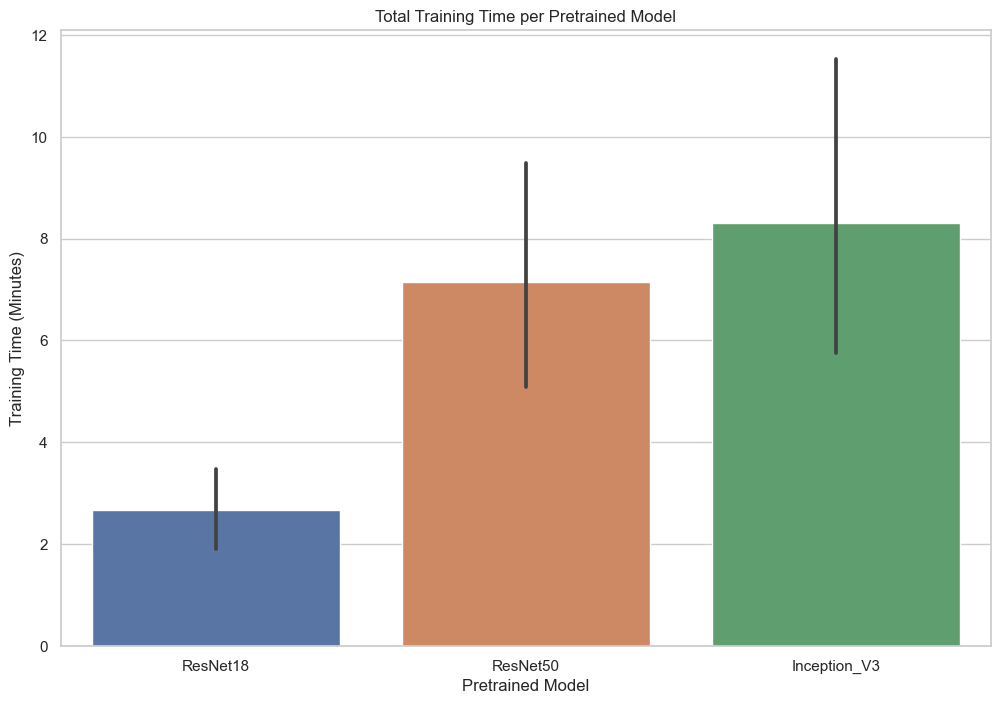

In [16]:
# Convert 'TrainingSeconds' to minutes
data['TotalTrainingTime'] = data['Training Minutes'] + data['Training Seconds'] / 60

# Bar chart of Training Time (Minutes) by Pretrained Model:
plt.figure(figsize=(12, 8))
sns.barplot(x="Pretrained Model", y="TotalTrainingTime", data=data)
plt.xlabel("Pretrained Model")
plt.ylabel("Training Time (Minutes)")
plt.title("Total Training Time per Pretrained Model")
plt.show()

#### Training Time by Dataset Size and CNN Model

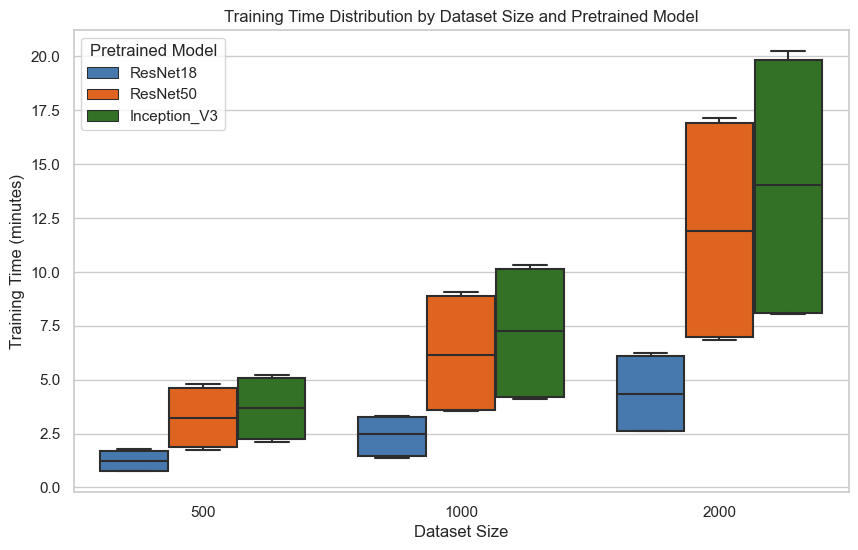

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot for Training Time by Epoch and Pretrained Model
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Increased figure size
ax = sns.boxplot(x='Dataset Size', y='Training Time', hue='Pretrained Model', data=data, showfliers=False, palette=['#3778bf', '#ff5b00', '#2a7e19'])
plt.title('Training Time Distribution by Dataset Size and Pretrained Model')
plt.ylabel('Training Time (minutes)')
plt.xlabel('Dataset Size')

plt.show()

In [18]:
# Calculate median training times
medians = data.groupby(['Dataset Size', 'Pretrained Model'])['Training Time'].median().reset_index()

# Print median values
for idx, row in medians.iterrows():
    print(f"Dataset Size: {row['Dataset Size']}, Pretrained Model: {row['Pretrained Model']}, Median Training Time: {row['Training Time']:.2f} minutes")

Dataset Size: 500, Pretrained Model: Inception_V3, Median Training Time: 3.67 minutes
Dataset Size: 500, Pretrained Model: ResNet18, Median Training Time: 1.21 minutes
Dataset Size: 500, Pretrained Model: ResNet50, Median Training Time: 3.22 minutes
Dataset Size: 1000, Pretrained Model: Inception_V3, Median Training Time: 7.24 minutes
Dataset Size: 1000, Pretrained Model: ResNet18, Median Training Time: 2.50 minutes
Dataset Size: 1000, Pretrained Model: ResNet50, Median Training Time: 6.15 minutes
Dataset Size: 2000, Pretrained Model: Inception_V3, Median Training Time: 14.02 minutes
Dataset Size: 2000, Pretrained Model: ResNet18, Median Training Time: 4.34 minutes
Dataset Size: 2000, Pretrained Model: ResNet50, Median Training Time: 11.88 minutes


#### Training Time by Training Epochs and CNN Model

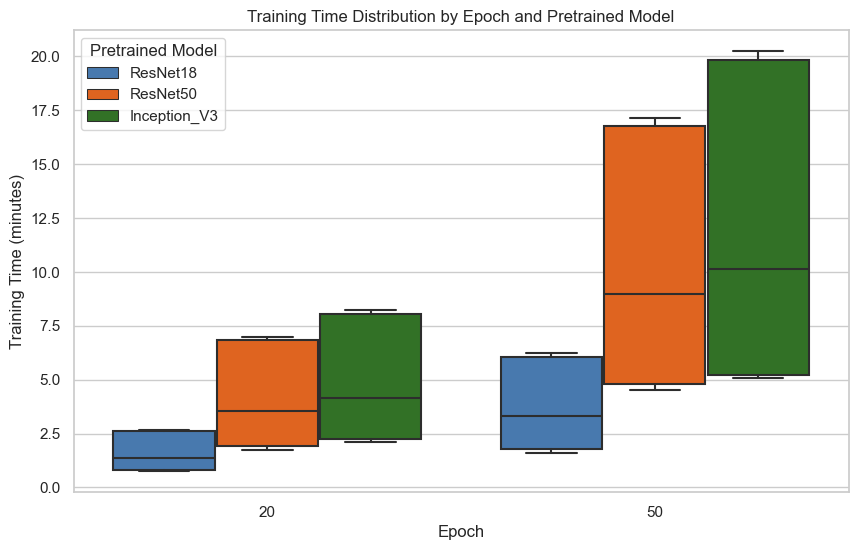

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot for Training Time by Epoch and Pretrained Model
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Increased figure size
ax = sns.boxplot(x='Epoch', y='Training Time', hue='Pretrained Model', data=data, showfliers=False, palette=['#3778bf', '#ff5b00', '#2a7e19'])
plt.title('Training Time Distribution by Epoch and Pretrained Model')
plt.ylabel('Training Time (minutes)')
plt.xlabel('Epoch')

plt.show()

In [20]:
# Calculate median training times
medians = data.groupby(['Epoch', 'Pretrained Model'])['Training Time'].median().reset_index()

# Print median values
for idx, row in medians.iterrows():
    print(f"Epoch: {row['Epoch']}, Pretrained Model: {row['Pretrained Model']}, Median Training Time: {row['Training Time']:.2f} minutes")

Epoch: 20, Pretrained Model: Inception_V3, Median Training Time: 4.17 minutes
Epoch: 20, Pretrained Model: ResNet18, Median Training Time: 1.37 minutes
Epoch: 20, Pretrained Model: ResNet50, Median Training Time: 3.57 minutes
Epoch: 50, Pretrained Model: Inception_V3, Median Training Time: 10.13 minutes
Epoch: 50, Pretrained Model: ResNet18, Median Training Time: 3.30 minutes
Epoch: 50, Pretrained Model: ResNet50, Median Training Time: 8.95 minutes


## Training and Validation Accuracy

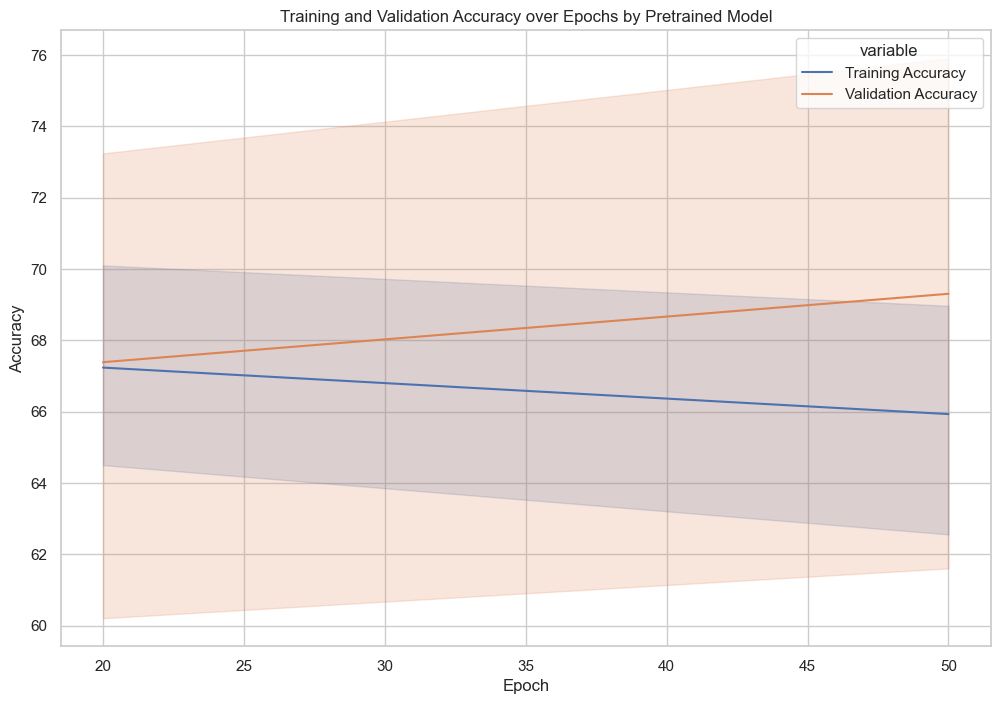

In [21]:
#Line Plot for Training and Validation Accuracy over Epochs (grouped by Pretrained Model):
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x='Epoch', y='value', hue='variable', 
             data=pd.melt(data, id_vars=['Epoch', 'Pretrained Model'], 
                           value_vars=['Training Accuracy', 'Validation Accuracy']))
plt.title('Training and Validation Accuracy over Epochs by Pretrained Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

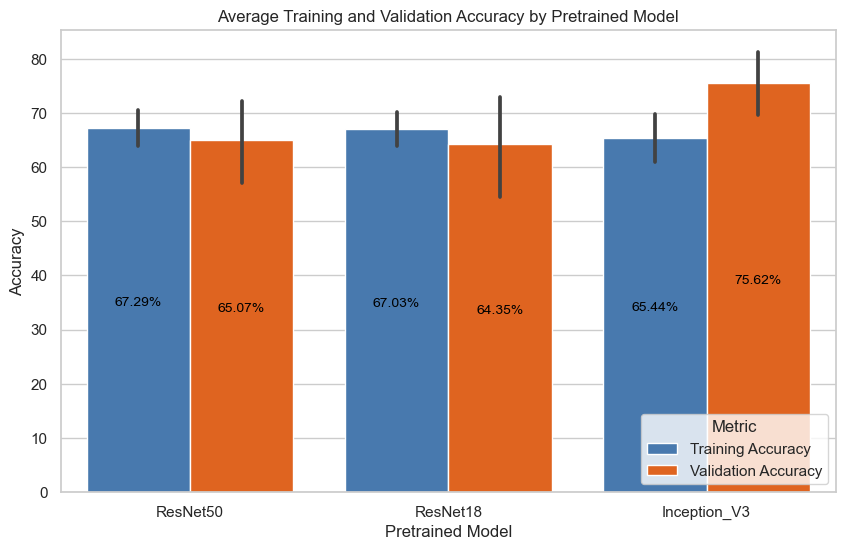

In [22]:
# Bar Plot for Average Training and Validation Accuracy by Pretrained Model:

# Calculate the average TrainingAccuracy and ValidationAccuracy for each PretrainedModel
avg_data = data.groupby('Pretrained Model')[['Training Accuracy', 'Validation Accuracy']].mean().reset_index()

# Define the order of PretrainedModel based on average TrainingAccuracy
order = avg_data.sort_values('Training Accuracy', ascending=False)['Pretrained Model']

# Set custom palette with orange and blue colors
custom_palette = ['#3778bf', '#ff5b00']  # Orange and blue

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Pretrained Model', y='value', hue='variable', 
            data=pd.melt(data, id_vars=['Pretrained Model'], 
                          value_vars=['Training Accuracy', 'Validation Accuracy']), order=order, palette=custom_palette)
plt.title('Average Training and Validation Accuracy by Pretrained Model')
plt.ylabel('Accuracy')
plt.xlabel('Pretrained Model')

# Add values in the middle of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() /2) , 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.legend(title='Metric', loc='lower right')
plt.show()

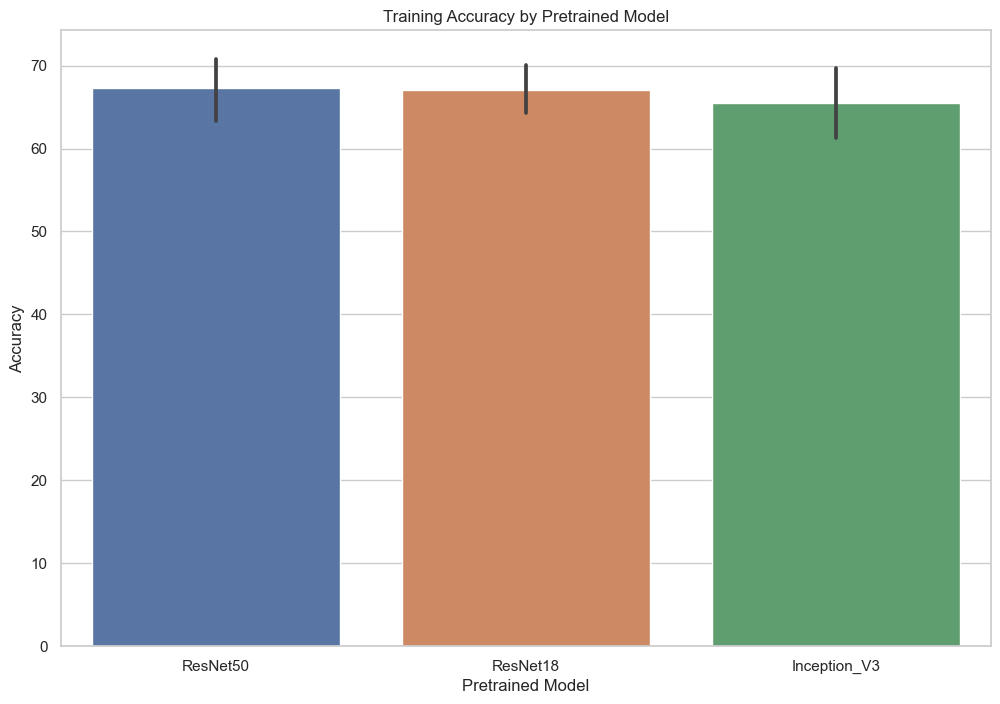

In [23]:
#Bar Plot for Training Accuracy by Pretrained Model:
# Define the order of PretrainedModel based on TrainingAccuracy
order = data.groupby('Pretrained Model')['Training Accuracy'].mean().sort_values(ascending=False).index

# Bar Plot for Training Accuracy by Pretrained Model
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Pretrained Model', y='Training Accuracy', data=data, order=order)
plt.title('Training Accuracy by Pretrained Model')
plt.ylabel('Accuracy')
plt.xlabel('Pretrained Model')
plt.show()

#### Validation Accuracy by Model and Epoch

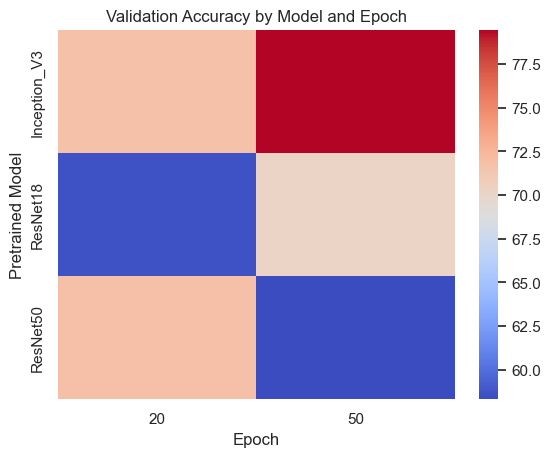

In [24]:
# Visualization 1: Heatmap of Validation Accuracy by Model and Epoch
# Fill NaN values with 0
data_filled = data.fillna(0)

sns.heatmap(data_filled.pivot_table(values='Validation Accuracy', index='Pretrained Model', columns='Epoch'),
            cmap='coolwarm')  # Change the color here
plt.xlabel('Epoch')
plt.ylabel('Pretrained Model')
plt.title('Validation Accuracy by Model and Epoch')
plt.show()

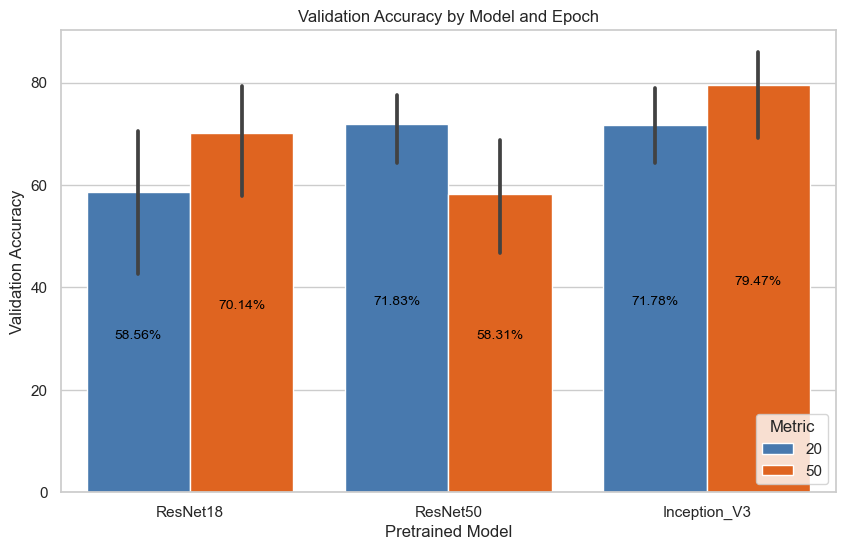

In [25]:
# bar chart of Validation Accuracy by Model and Epoch
# Set custom palette with orange and blue colors
custom_palette = ['#3778bf', '#ff5b00']  # Orange and blue


plt.figure(figsize=(10, 6))
sns.barplot(x='Pretrained Model', y='Validation Accuracy', hue='Epoch', data=data, palette=custom_palette)
plt.xlabel('Pretrained Model')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy by Model and Epoch')
plt.legend(title='Epoch')

# Add values in the middle of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height/ 2), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.legend(title='Metric', loc='lower right')
plt.show()